In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

## 일단 기사 100개만 넣어서 LDA 모델만들고 Topic modeling

In [2]:
import pandas as pd
file_path = '/Users/JooAnLee/mid_project/src/datasets/수도권_아파트_청약_뉴스_크롤링.csv'
df = pd.read_csv(file_path)
df.head()

,title,content,url,apartment
0,“7인 가구에 무주택 15년 이상”…새해 첫 만점통장 ‘이곳’서 나왔다,의왕 월암지구 대방 디에트르 레이크파크 조감도. [사진 출처 = 대방건설]경기도 의...,https://n.news.naver.com/mnews/article/009/000...,의왕 월암지구 대방 디에트르 레이크파크
1,올해 첫 청약 통장 만점 나온 단지는…서울 아니고 이곳,'의왕 디에트르 레이크파크'서 84점 나와[서울경제]의왕 월암 디에트르 레이크파크 ...,https://n.news.naver.com/mnews/article/011/000...,의왕 월암지구 대방 디에트르 레이크파크
2,"""지금 아니면 내집마련 못한다?""...새해 첫 84점 만점통장 나왔다",아파트 견본주택 전경. 사진=연합뉴스[파이낸셜뉴스] 무적통장으로 불리는 84점 만점...,https://n.news.naver.com/mnews/article/014/000...,의왕 월암지구 대방 디에트르 레이크파크
3,강달러 간다는데 환율 더 오르나 [3분 브리프],[한 눈에 읽기]①금값 내년에도 고공행진 전망②1년새 121% 상승한 비트코인③머스...,https://n.news.naver.com/mnews/article/277/000...,의왕 월암지구 대방 디에트르 레이크파크
4,[1월 1주 분양동향] '검단신도시파밀리에엘리프' 등 5911가구 분양,일반분양 기준으론 5014가구⋯새해 맞아 견본주택 개관은 전무푸른 뱀의 해인 새해 ...,https://n.news.naver.com/mnews/article/031/000...,의왕 월암지구 대방 디에트르 레이크파크


In [3]:
train_df = df.iloc[:100]
train_df.head()

,title,content,url,apartment
0,“7인 가구에 무주택 15년 이상”…새해 첫 만점통장 ‘이곳’서 나왔다,의왕 월암지구 대방 디에트르 레이크파크 조감도. [사진 출처 = 대방건설]경기도 의...,https://n.news.naver.com/mnews/article/009/000...,의왕 월암지구 대방 디에트르 레이크파크
1,올해 첫 청약 통장 만점 나온 단지는…서울 아니고 이곳,'의왕 디에트르 레이크파크'서 84점 나와[서울경제]의왕 월암 디에트르 레이크파크 ...,https://n.news.naver.com/mnews/article/011/000...,의왕 월암지구 대방 디에트르 레이크파크
2,"""지금 아니면 내집마련 못한다?""...새해 첫 84점 만점통장 나왔다",아파트 견본주택 전경. 사진=연합뉴스[파이낸셜뉴스] 무적통장으로 불리는 84점 만점...,https://n.news.naver.com/mnews/article/014/000...,의왕 월암지구 대방 디에트르 레이크파크
3,강달러 간다는데 환율 더 오르나 [3분 브리프],[한 눈에 읽기]①금값 내년에도 고공행진 전망②1년새 121% 상승한 비트코인③머스...,https://n.news.naver.com/mnews/article/277/000...,의왕 월암지구 대방 디에트르 레이크파크
4,[1월 1주 분양동향] '검단신도시파밀리에엘리프' 등 5911가구 분양,일반분양 기준으론 5014가구⋯새해 맞아 견본주택 개관은 전무푸른 뱀의 해인 새해 ...,https://n.news.naver.com/mnews/article/031/000...,의왕 월암지구 대방 디에트르 레이크파크


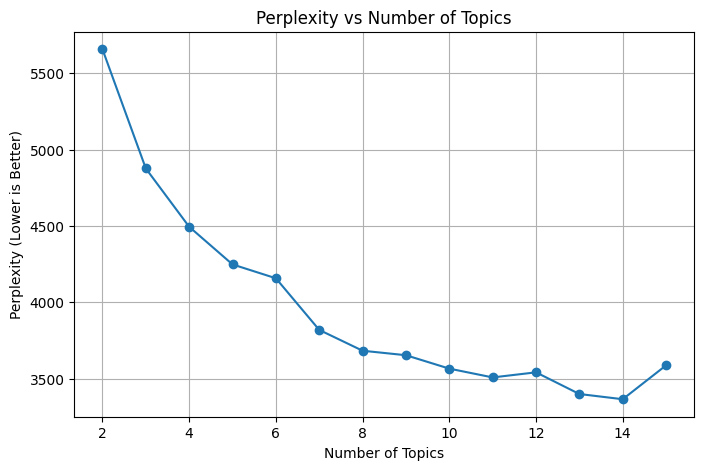

In [4]:
# 최적 토픽 개수 설정
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# 1. 벡터화 (CountVectorizer)
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    ngram_range=(1, 2), # unigram + bigram 사용
    stop_words=['에서', '그리고', '하지만', '때문에', '지난', '있다', '하는', '했다', '수']
)

# 코퍼스 생성
corpus = train_df['content'][:100].tolist()
dtm = vectorizer.fit_transform(corpus)

# 2. 최적 토픽 개수 찾기
perplexities = []
topic_range = range(2, 16) # 토픽 개수 2개 ~ 15개 테스트

for n_topics in topic_range:
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        doc_topic_prior=0.1, 
        random_state=42
    )
    lda.fit(dtm)
    perplexities.append(lda.perplexity(dtm))

# 3. Perplexity 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.grid()
plt.show()

In [5]:
# 2. LDA 모델 학습 (n_components=8로 설정)
lda = LatentDirichletAllocation(
    n_components=8, 
    doc_topic_prior=0.1, 
    random_state=42
)
lda.fit(dtm)

# 3. 토픽별 주요 키워드 출력
topic_names = ['교통', '시세차익', '입지', '개발', '대출', '공시가', '경쟁률', '가산점']

terms = vectorizer.get_feature_names_out()
topic_keywords = {}
for i, topic in enumerate(lda.components_):
    top_keywords = [terms[j] for j in topic.argsort()[-10:]]
    topic_keywords[topic_names[i]] = top_keywords

# 4. 기사별 주요 토픽 점수 출력
doc_topic = lda.transform(dtm)

results = []
for i, topic_dist in enumerate(doc_topic):
    top_topic = topic_dist.argmax()
    result = {
        '기사 번호': i + 1,
        '주요 토픽': topic_names[top_topic],
        '토픽 비율': {topic_names[j]: topic_dist[j] for j in range(len(topic_names))}
    }
    results.append(result)

# 5. 결과 출력
import pprint
print("\n[토픽별 주요 키워드]")
pprint.pprint(topic_keywords)

print("\n[기사별 주요 토픽 비율]")
pprint.pprint(results)


[토픽별 주요 키워드]
{'가산점': ['것으로',
         '아이파크',
         '가장',
         '푸르지오',
         '올해',
         '1순위에서',
         '1순위 마감',
         '마감',
         '청약',
         '1순위'],
 '개발': ['분양',
        '롯데캐슬 시그니처',
        '서울',
        '시그니처',
        '중도금',
        '미분양',
        '계약금',
        '창경궁 롯데캐슬',
        '창경궁',
        '롯데캐슬'],
 '경쟁률': ['최근', '준공', '전국', '것으로', '분양', '1월', '서울', '아파트', '인천', '미분양'],
 '공시가': ['것으로', '경쟁률을', '수도권', '3대', '핵심', '분양', '평균', '대규모', '청약', '7호선'],
 '교통': ['전용', '00', '강남', '따르면', '청약', '모집에', '아파트', '1순위', '미분양', '서울'],
 '대출': ['59',
        '래미안',
        '서울',
        '전용',
        '84',
        '리버포레',
        '라온프라이빗 리버포레',
        '덕소역 라온프라이빗',
        '라온프라이빗',
        '덕소역'],
 '시세차익': ['가격은',
          '지역',
          '인천',
          '서울 부동산',
          '송도 부동산',
          '송도 아파트',
          '아파트',
          '서울',
          '송도',
          '부동산'],
 '입지': ['청약을',
        '전용 84',
        '푸르지오',
        '브레인시티 푸르지오',
        '평택시',
        '전

In [8]:
import pandas as pd

# 기사별 주요 토픽 점수 출력
doc_topic = lda.transform(dtm)

# 토픽 이름 설정
topic_names = ['교통', '시세차익', '입지', '개발', '대출', '공시가', '경쟁률', '가산점']

# 기사별 토픽 비율 정리 (테이블 형식)
topic_df = pd.DataFrame(doc_topic, columns=topic_names)
topic_df.insert(0, '기사 번호', range(1, len(topic_df) + 1))

# 주요 토픽 추가
topic_df['주요 토픽'] = topic_df[topic_names].idxmax(axis=1)

# 결과 출력 (테이블 형식)
topic_df.head(20)


,기사 번호,교통,시세차익,입지,개발,대출,공시가,경쟁률,가산점,주요 토픽
0,1,0.000397,0.000397,0.000397,0.000397,0.997220,0.000397,0.000397,0.000397,대출
1,2,0.000445,0.000445,0.000445,0.000445,0.996886,0.000445,0.000445,0.000445,대출
2,3,0.000355,0.000355,0.000355,0.000355,0.997516,0.000355,0.000355,0.000355,대출
3,4,0.403449,0.000654,0.000654,0.000654,0.000654,0.000655,0.592624,0.000655,경쟁률
4,5,0.000445,0.000445,0.000445,0.000445,0.000445,0.000445,0.996886,0.000445,경쟁률
5,6,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.997928,0.000296,경쟁률
6,7,0.000585,0.000585,0.000586,0.486322,0.000586,0.000586,0.510164,0.000585,경쟁률
7,8,0.000516,0.000516,0.000516,0.440134,0.000516,0.000516,0.556770,0.000516,경쟁률
8,9,0.000283,0.000283,0.000283,0.000283,0.000283,0.000283,0.998016,0.000283,경쟁률
9,10,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.998071,0.000276,경쟁률


## 기사 전체 다 넣어서 Topic modeling

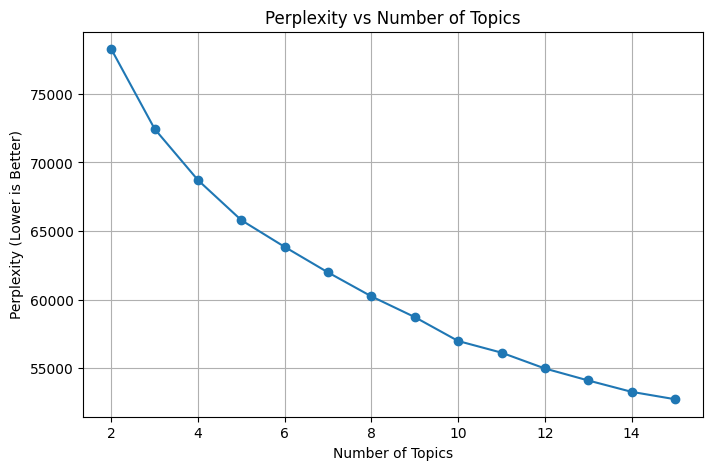

In [9]:
# 최적 토픽 개수 설정
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# 1. 벡터화 (CountVectorizer)
vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2,
    ngram_range=(1, 2), # unigram + bigram 사용
    stop_words=['에서', '그리고', '하지만', '때문에', '지난', '있다', '하는', '했다', '수']
)

# 코퍼스 생성
corpus_total = df['content'].tolist()
dtm_total = vectorizer.fit_transform(corpus_total)

# 2. 최적 토픽 개수 찾기
perplexities = []
topic_range = range(2, 16) # 토픽 개수 2개 ~ 15개 테스트

for n_topics in topic_range:
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        doc_topic_prior=0.1, 
        random_state=42
    )
    lda.fit(dtm_total)
    perplexities.append(lda.perplexity(dtm_total))

# 3. Perplexity 시각화
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity (Lower is Better)')
plt.grid()
plt.show()

In [10]:
# 전처리해야함!!!!